## MARKET SEGMENTATION ANALYSIS

In [57]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio

pio.renderers.default = "svg"

In [58]:
df = pd.read_csv("Datasets/crop_production.csv")

In [59]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0000,2000.0000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0000,1.0000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0000,321.0000
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0000,641.0000
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0000,165.0000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [61]:
df.describe()

,Crop_Year,Area,Production
count,246091.0000,246091.0000,242361.0000
mean,2005.6430,12002.8209,582503.4423
std,4.9522,50523.4040,17065813.1724
min,1997.0000,0.0400,0.0000
25%,2002.0000,80.0000,88.0000
50%,2006.0000,582.0000,729.0000
75%,2010.0000,4392.0000,7023.0000
max,2015.0000,8580100.0000,1250800000.0000


State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

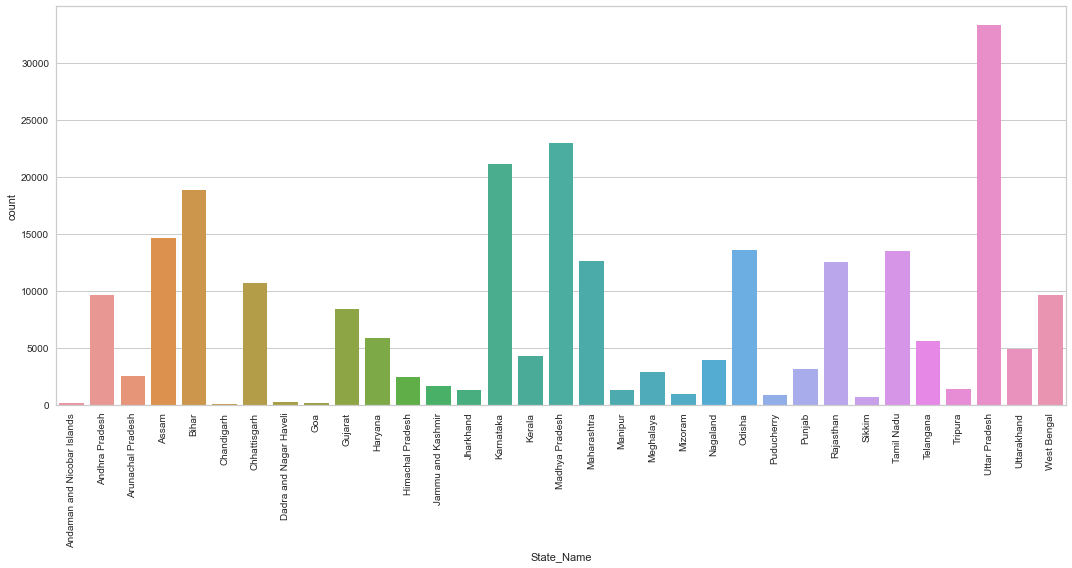

Season
Kharif        95951
Rabi          66987
Whole Year    57305
Summer        14841
Winter         6058
Autumn         4949
Name: count, dtype: int64


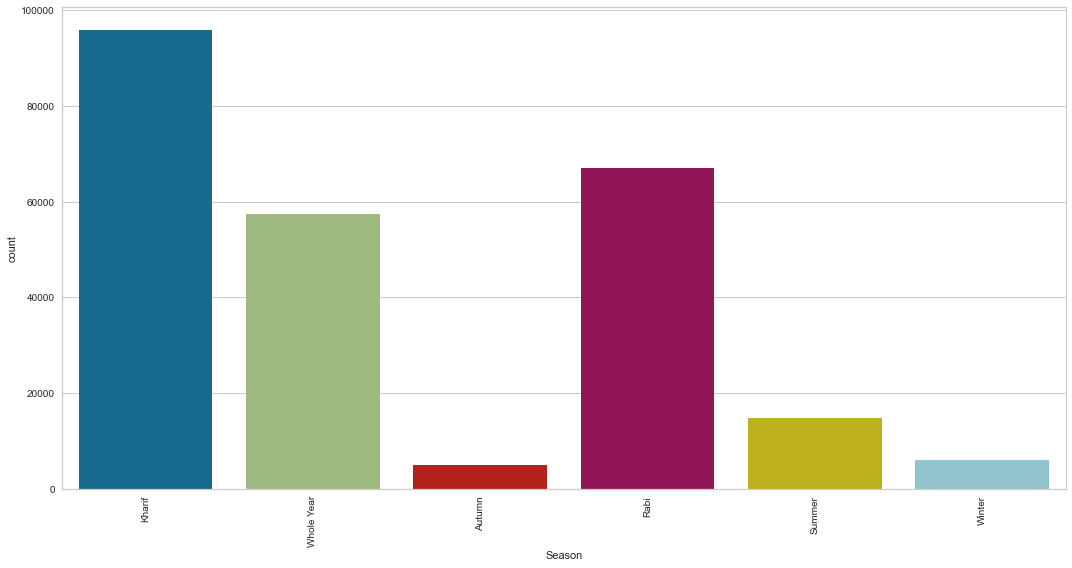

In [62]:
categorical_vars = ['State_Name', 'Season']
for var in categorical_vars:
    print(df[var].value_counts())
    plt.figure(figsize=(15,8))
    sns.countplot(x=var, data=df)

    plt.xticks(rotation=90)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


### Observations :
* Kharif and Rabi seasons are more dominant according to the bar plots.
* Andhra Pradesh ,Assam , Bihar , Chattisgarh, Gujarat, Haryana , Karnataka , Madhya Pradesh ,Maharasthra , Odisha ,Rajasthan , Tamil Nadu, Telangana, Uttar Pradesh,West Bengal have atleast 5000 rows of records. 

In [63]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [64]:
df['Production'].interpolate(method='linear', inplace=True)  # Interpolate missing values linearly


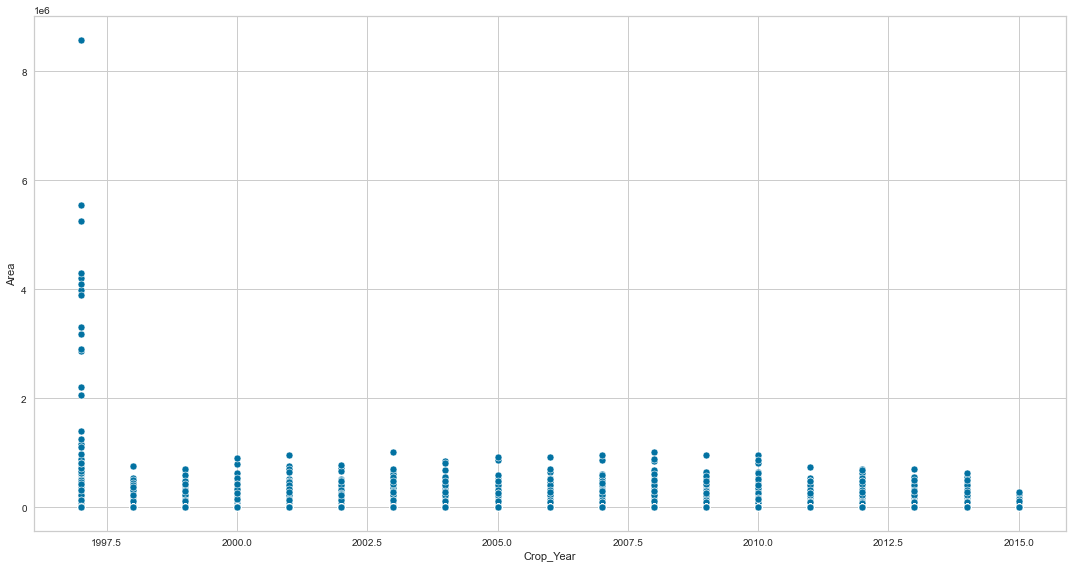

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Crop_Year', y='Area', data=df)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<ipython-input-66-bec28c27b363>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



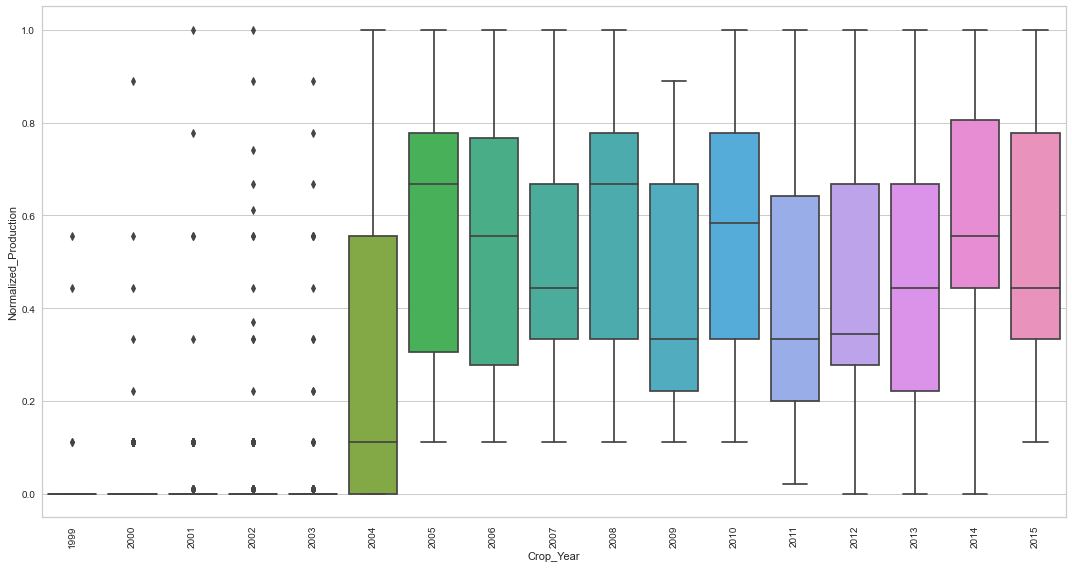

In [66]:
# Apply Threshold
plt.figure(figsize=(15,8))
threshold = 0.998
df_filtered = df[df['Production'] <= threshold]

# Normalize Data
normalized_production = (df_filtered['Production'] - df_filtered['Production'].min()) / (df_filtered['Production'].max() - df_filtered['Production'].min())
df_filtered['Normalized_Production'] = normalized_production

# Plot the boxplot
sns.boxplot(x='Crop_Year', y='Normalized_Production', data=df_filtered)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-67-3b03da91f9f7>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



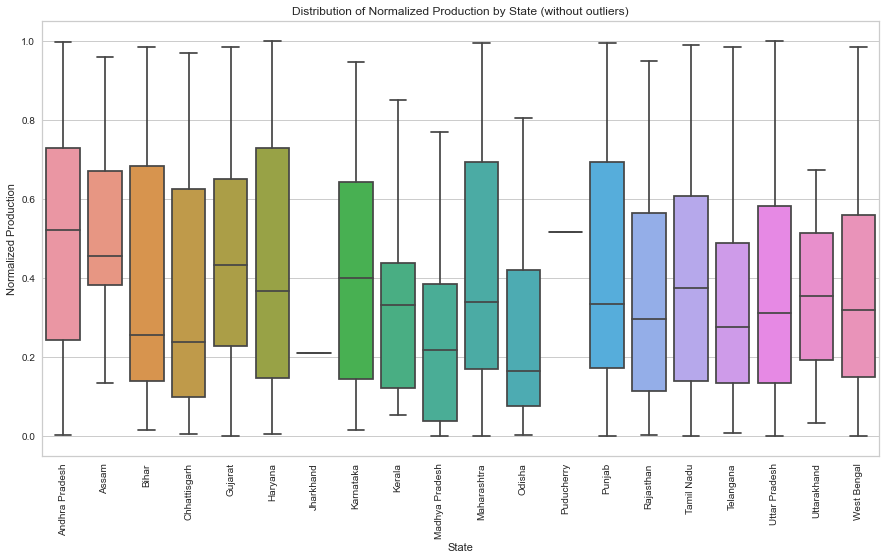

In [67]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(15,8))
# Calculate the z-scores for the 'Production' column
z_scores = stats.zscore(df['Production'])
# Define a threshold for outlier removal (e.g., z-score > 3 or < -3)
threshold = 0.01
# Create a mask for outliers
outlier_mask = (np.abs(z_scores) < threshold)
# Apply the mask to remove outliers
df_no_outliers = df[outlier_mask]
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Normalize the 'Production' column in the dataframe without outliers
df_no_outliers['Production_normalized'] = scaler.fit_transform(df_no_outliers[['Production']])
# Plot the boxplot with normalized data and without outliers
sns.boxplot(x='State_Name', y='Production_normalized', data=df_no_outliers)

plt.xlabel('State')
plt.ylabel('Normalized Production')
plt.title('Distribution of Normalized Production by State (without outliers)')
plt.xticks(rotation=90)
plt.show()


A high median in a boxplot for Andhra Pradesh indicates that the central tendency of the 'Production' values for the crops in Andhra Pradesh is relatively high compared to other states or crop years. The median represents the middle value of the data, separating the lower 50% of the data from the upper 50%.
* Higher Production: The crops in Andhra Pradesh, on average, have a higher production compared to other states or crop years. This suggests favorable agricultural conditions or effective farming practices in Andhra Pradesh.
* Agricultural Productivity: Andhra Pradesh might have a favorable environment, soil quality, or climate that promotes higher crop yields. This could be attributed to factors such as suitable temperature, rainfall, irrigation facilities, or advanced agricultural techniques in the region.

<ipython-input-69-b69484159c00>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-b69484159c00>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



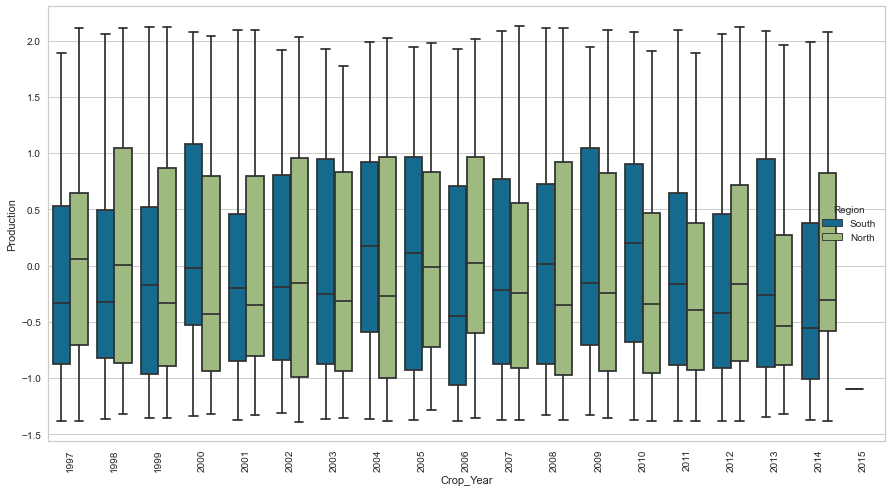

<Figure size 720x3600 with 0 Axes>

In [69]:
# Define the list of states in North India
north_states = ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Uttar Pradesh', 'Haryana', 'Rajasthan', 'Delhi']

# Define the list of states in South India
south_states = ['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Puducherry']
z_scores = np.abs(stats.zscore(df['Production']))
threshold = 0.01
df_filtered = df[(z_scores < threshold)]
plt.figure(figsize=(15,8))
# Standardize the 'Production' column
scaler = StandardScaler()
df_filtered['Production'] = scaler.fit_transform(df_filtered['Production'].values.reshape(-1, 1))
df_filtered['Region'] = df_filtered['State_Name'].apply(lambda x: 'North' if x in north_states else 'South')
sns.boxplot(x='Crop_Year', y='Production', hue='Region', data=df_filtered)
plt.xticks(rotation=90)


plt.figure(figsize=(10,50))
plt.tight_layout()
plt.show()

According to the above plot , From 1997 to 2014 the Farmers of South India are having higher production than North India.

### dataset_2

In [70]:
df1 = pd.read_excel("Crop-wise_State-wise_Land holdings_Area_Number.xlsx",skiprows=1)
df1.head()

,S. No.,Category,Crop,State,Avg area of marginal holdings,Avg area of small land holdings,Avg area of semi medium land holdings,Avg area of medium land holdings,Avg area of large land holdings,Avg area of institutional land holdings,Avg area of total land holdings
0,1.0000,Cereals,Paddy,Andhra Pradesh & Telangana,0.4846,1.2292,2.3798,3.7088,6.2912,5.1849,0.9331
1,NaN,Cereals,Paddy,Assam,0.4167,1.2455,2.4507,4.6661,44.1984,31.0875,1.0124
2,NaN,Cereals,Paddy,Bihar,0.2390,1.1311,2.3008,4.4406,12.5923,0.9441,0.3725
3,NaN,Cereals,Paddy,Chhattisgarh,0.4461,1.3212,2.3758,4.7461,12.2738,9.4697,1.2468
4,NaN,Cereals,Paddy,Gujarat,0.3619,1.0510,1.7094,3.0088,12.7709,2.8077,1.0694


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326 entries, 0 to 4325
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   S. No.                                   206 non-null    float64
 1   Category                                 3822 non-null   object 
 2   Crop                                     4326 non-null   object 
 3   State                                    4326 non-null   object 
 4   Avg area of marginal holdings            2662 non-null   float64
 5   Avg area of small land holdings          2642 non-null   float64
 6   Avg area of semi medium land holdings    2597 non-null   float64
 7   Avg area of medium land holdings         2455 non-null   float64
 8   Avg area of large land holdings          1953 non-null   float64
 9   Avg area of institutional land holdings  1380 non-null   float64
 10  Avg area of total land holdings          2897 no

#### Data Cleaning

In [72]:
df1.drop(["S. No."],axis=1,inplace=True)

In [73]:
df1["S.No"] = [i for i in range(0,4326)]

In [74]:
df1.set_index("S.No",inplace =True)

In [75]:
df1.describe()

,Avg area of marginal holdings,Avg area of small land holdings,Avg area of semi medium land holdings,Avg area of medium land holdings,Avg area of large land holdings,Avg area of institutional land holdings,Avg area of total land holdings
count,2662.0000,2642.0000,2597.0000,2455.0000,1953.0000,1380.0000,2897.0000
mean,0.2315,0.5002,0.8015,1.2982,6.3673,5.1394,0.6052
std,0.1687,0.4032,0.7289,1.3481,34.1334,25.2517,1.0853
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0909,0.1830,0.2645,0.3820,0.7064,0.2233,0.1683
50%,0.2107,0.4000,0.5833,0.8425,1.7742,1.0000,0.4000
75%,0.3412,0.7417,1.1229,1.7706,4.3374,3.0259,0.7664
max,1.1882,3.0305,5.7253,11.9539,868.6250,482.0000,32.3795


In [76]:
columns_to_encode = ["State", "Category", "Crop"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and encode the categorical values
for col in columns_to_encode:
    df1[col] = label_encoder.fit_transform(df1[col])
    print( label_encoder.classes_)

['Andhra Pradesh & Telangana' 'Assam' 'Bihar' 'Chhattisgarh' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Orissa' 'Others' 'Punjab'
 'Rajasthan' 'Tamil Nadu' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
['Aromatic Plants' 'Cereals' 'Drugs and Narcotics'
 'Dyes and Tannin Materials' 'Fibres' 'Floriculture Crops'
 'Fodder and Green Manures' 'Fruits' 'Medicinal Plants' 'Oil Seeds'
 'Plantation Crops' 'Pulses' 'Spices and Condiments' 'Sugar Crops'
 'Vegetables' nan]
['Ajwain' 'Almond' 'Aloevera' 'Amaranth' 'Amla' 'Anthurium' 'Apple'
 'Apricot' 'Arecanut' 'Arum' 'Ashwagandha' 'Bacopa Monnieri' 'Bajra'
 'Bamboo' 'Banana' 'Barley' 'Beans' 'Beetroot' 'Bel' 'Ber' 'Betel'
 'Bitter Gourd' 'Bottle Gourd' 'Breadfruit' 'Brinjal' 'Cabbage' 'Cane'
 'Cardamom' 'Cardamom (Large)' 'Cardamom (Small)' 'Carnation' 'Carrot'
 'Cashewnut' 'Castorseed' 'Casuarina' 'Cauliflower' 'Chilli'
 'Chrysanthemum' 'Cinnamon' 'Citrus' 'Clove' 'C

In [77]:
encoding_crop = {
    0: 'Ajwain',
    1: 'Almond',
    2: 'Aloevera',
    3: 'Amaranth',
    4: 'Amla',
    5: 'Anthurium',
    6: 'Apple',
    7: 'Apricot',
    8: 'Arecanut',
    9: 'Arum',
    10: 'Ashwagandha',
    11: 'Bacopa Monnieri',
    12: 'Bajra',
    13: 'Bamboo',
    14: 'Banana',
    15: 'Barley',
    16: 'Beans',
    17: 'Beetroot',
    18: 'Bel',
    19: 'Ber',
    20: 'Betel',
    21: 'Bitter Gourd',
    22: 'Bottle Gourd',
    23: 'Breadfruit',
    24: 'Brinjal',
    25: 'Cabbage',
    26: 'Cane',
    27: 'Cardamom',
    28: 'Cardamom (Large)',
    29: 'Cardamom (Small)',
    30: 'Carnation',
    31: 'Carrot',
    32: 'Cashewnut',
    33: 'Castorseed',
    34: 'Casuarina',
    35: 'Cauliflower',
    36: 'Chilli',
    37: 'Chrysanthemum',
    38: 'Cinnamon',
    39: 'Citrus',
    40: 'Clove',
    41: 'Cocoa',
    42: 'Coconut',
    43: 'Coffee',
    44: 'Coriander',
    45: 'Cotton',
    46: 'Cucumber',
    47: 'Cumin',
    48: 'Custard Apple',
    49: 'Drumstick',
    50: 'Elephant Foot Yam',
    51: 'Eucalyptus',
    52: 'Fennel',
    53: 'Fenugreek',
    54: 'Flowers',
    55: 'Gaillardia',
    56: 'Garlic',
    57: 'Gerbera',
    58: 'Ginger',
    59: 'Gladiolus',
    60: 'Gram',
    61: 'Grape',
    62: 'Green Chilli',
    63: 'Green Manure',
    64: 'Grim',
    65: 'Groundnut',
    66: 'Guar',
    67: 'Guava',
    68: 'Horsegram',
    69: 'Indigo',
    70: 'Isabgol',
    71: 'Jackfruit',
    72: 'Jamun',
    73: 'Jasmine',
    74: 'Jobstears',
    75: 'Jowar',
    76: 'Jute',
    77: 'Kacholam',
    78: 'Kiwi',
    79: 'Lemon',
    80: 'Lemon Grass',
    81: 'Lichi',
    82: 'Linseed',
    83: 'Little Gourd',
    84: 'Maize',
    85: 'Mango',
    86: 'Marigold',
    87: 'Masur',
    88: 'Mehndi',
    89: 'Menthol',
    90: 'Mesta',
    91: 'Mint',
    92: 'Moong',
    93: 'Mosambi',
    94: 'Moth',
    95: 'Mulberry',
    96: 'Muskmelon',
    97: 'Musli',
    98: 'Nigerseed',
    99: 'Nutmeg',
    100: 'Oats',
    101: 'Oil Palm',
    102: 'Okra',
    103: 'Onion',
    104: 'Opium',
    105: 'Orange',
    106: 'Orchids',
    107: 'Other Aromatic Plants',
    108: 'Other Cereals',
    109: 'Other Citrus Fruits',
    110: 'Other Drugs and Narcotics',
    111: 'Other Dyes and Tannin Materials',
    112: 'Other Fibres',
    113: 'Other Flowers',
    114: 'Other Fodder Crops',
    115: 'Other Food Crops',
    116: 'Other Fruits',
    117: 'Other Gourds',
    118: 'Other Leafy Vegetables',
    119: 'Other Medicinal Plants',
    120: 'Other Non-food Crops',
    121: 'Other Oilseeds',
    122: 'Other Plantation Crops',
    123: 'Other Pulses',
    124: 'Other Spices and Condiments',
    125: 'Other Sugar Crops',
    126: 'Other Tuber Crops',
    127: 'Other Vegetables',
    128: 'Paddy',
    129: 'Palmvriah',
    130: 'Papaya',
    131: 'Passion Fruit',
    132: 'Peach',
    133: 'Pear',
    134: 'Peas',
    135: 'Peas (Vegetable)',
    136: 'Pepper',
    137: 'Pineapple',
    138: 'Plantain',
    139: 'Plum',
    140: 'Pomegranate',
    141: 'Potato',
    142: 'Pumpkin',
    143: 'Radish',
    144: 'Ragi',
    145: 'Rambutan',
    146: 'Ramdana',
    147: 'Rapeseed & Mustard',
    148: 'Ridge Gourd',
    149: 'Rose',
    150: 'Rubber',
    151: 'Safflower',
    152: 'Saffron',
    153: 'Sandalwood',
    154: 'Sapota',
    155: 'Sawan',
    156: 'Sem',
    157: 'Senna',
    158: 'Sesamum',
    159: 'Shahtoot',
    160: 'Small Millets',
    161: 'Snake Gourd',
    162: 'Soyabean',
    163: 'Spinach',
    164: 'Subabul',
    165: 'Sugarcane',
    166: 'Sunflower',
    167: 'Sunhemp',
    168: 'Sweet Potato',
    169: 'Tamarind',
    170: 'Tapioca',
    171: 'Tea',
    172: 'Teak',
    173: 'Thespesia',
    174: 'Tinda',
    175: 'Tobacco',
    176: 'Tomato',
    177: 'Total Aromatic and Medicinal Plants',
    178: 'Total Cereals',
    179: 'Total Drugs and Narcotics',
    180: 'Total Dyes and Tannin Materials',
    181: 'Total Fibres',
    182: 'Total Floriculture Crops',
    183: 'Total Fodder Crops',
    184: 'Total Food Crops',
    185: 'Total Foodgrains',
    186: 'Total Fruits',
    187: 'Total Non-food Crops',
    188: 'Total Oilseeds',
    189: 'Total Plantation Crops',
    190: 'Total Pulses',
    191: 'Total Spices and Condiments',
    192: 'Total Sugar Crops',
    193: 'Total Vegetables',
    194: 'Tuberose',
    195: 'Tur',
    196: 'Turmeric',
    197: 'Turnip',
    198: 'Urad',
    199: 'Vanilla',
    200: 'Walnut',
    201: 'Watermelon',
    202: 'Wheat',
    203: 'Wine Grape',
    204: 'Yam'}


In [78]:
encoded_Category = {
    0: 'Aromatic Plants',
    1: 'Cereals',
    2: 'Drugs and Narcotics',
    3: 'Dyes and Tannin Materials',
    4: 'Fibres',
    5: 'Floriculture Crops',
    6: 'Fodder and Green Manures',
    7: 'Fruits',
    8: 'Medicinal Plants',
    9: 'Oil Seeds',
    10: 'Plantation Crops',
    11: 'Pulses',
    12: 'Spices and Condiments',
    13: 'Sugar Crops',
    14: 'Vegetables',
    15: 'seeds'
}
encoded_state ={
    0: 'Andhra Pradesh & Telangana',
    1: 'Assam',
    2: 'Bihar',
    3: 'Chhattisgarh',
    4: 'Gujarat',
    5: 'Haryana',
    6: 'Himachal Pradesh',
    7: 'Jammu & Kashmir',
    8: 'Jharkhand',
    9: 'Karnataka',
    10: 'Kerala',
    11: 'Madhya Pradesh',
    12: 'Maharashtra',
    13: 'Orissa',
    14: 'Others',
    15: 'Punjab',
    16: 'Rajasthan',
    17: 'Tamil Nadu',
    18: 'Uttar Pradesh',
    19: 'Uttarakhand',
    20: 'West Bengal'
}


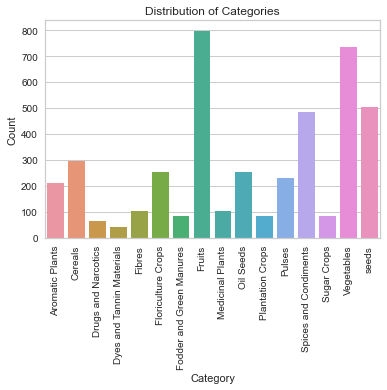

In [79]:
sns.countplot(x='Category', data=df1)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
category_names = list(encoded_Category.values())
plt.xticks(range(len(encoded_Category)), category_names, rotation=90)

plt.show()

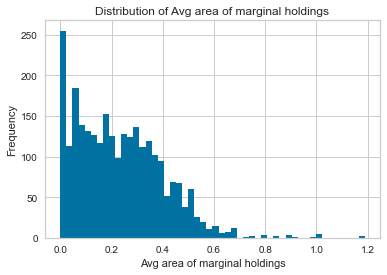

In [80]:
# Assuming 'Avg area of marginal holdings' is a numeric column
plt.hist(df1['Avg area of marginal holdings'], bins=50)
plt.xlabel('Avg area of marginal holdings')
plt.ylabel('Frequency')
plt.title('Distribution of Avg area of marginal holdings')
plt.show()


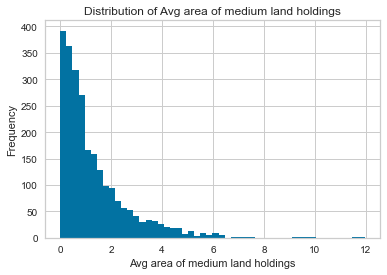

In [81]:
# Assuming 'Avg area of marginal holdings' is a numeric column
plt.hist(df1['Avg area of medium land holdings'], bins=50)
plt.xlabel('Avg area of medium land holdings')
plt.ylabel('Frequency')
plt.title('Distribution of Avg area of medium land holdings')
plt.show()


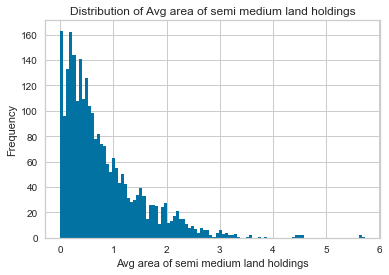

In [82]:
# Assuming 'Avg area of marginal holdings' is a numeric column
plt.hist(df1['Avg area of semi medium land holdings'], bins=100)
plt.xlabel('Avg area of semi medium land holdings')
plt.ylabel('Frequency')
plt.title('Distribution of Avg area of semi medium land holdings')
plt.show()


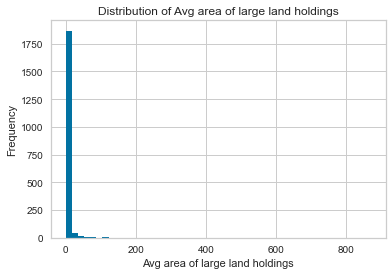

In [83]:
# Assuming 'Avg area of marginal holdings' is a numeric column
plt.hist(df1['Avg area of large land holdings'], bins=50)
plt.xlabel('Avg area of large land holdings')
plt.ylabel('Frequency')
plt.title('Distribution of Avg area of large land holdings')
plt.show()



##### Observations  :
*  The graph shows that most of the farmers are owning  very little amount of land for farming.
* Most of the farmers are small farmers.
* Fruits ,Vegetables , Spices and Condiments , Cereals, Floriculture crops , Oil seeds ,Pulses , Aromatic Plants are the important categores of crops that are in great demand according to the farmers . 
* Fruits and Vegetables are the Dominant of all the other categories. of crops.


<AxesSubplot:>

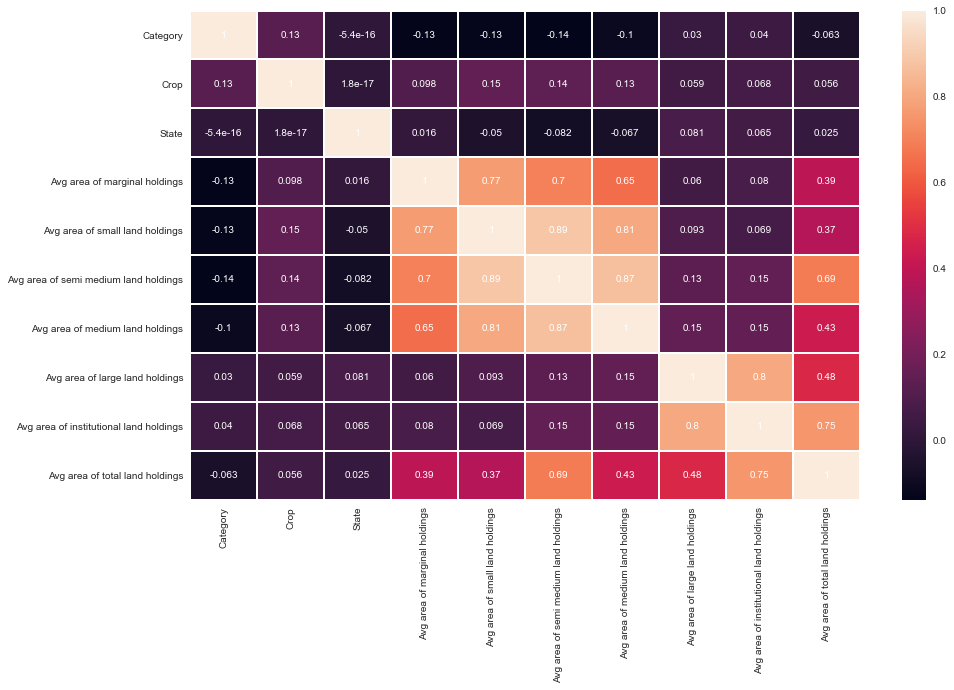

In [85]:
ax = plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(),linewidths =1 , linecolor="white",annot = True,annot_kws={"color": "white"})


In [86]:
df1['Crop'] .value_counts().sort_values(ascending=False).head()

Crop
66     42
178    21
12     21
84     21
144    21
Name: count, dtype: int64

In [87]:
print(encoding_crop[66],encoding_crop[178],encoding_crop[12],encoding_crop[84],encoding_crop[144])

Guar Total Cereals Bajra Maize Ragi


In [88]:
top_crops = ["Guar" ,"Total Cereals" ,"Bajra" ,"Maize" ,"Ragi"]
values = [42,21,21,21,21]

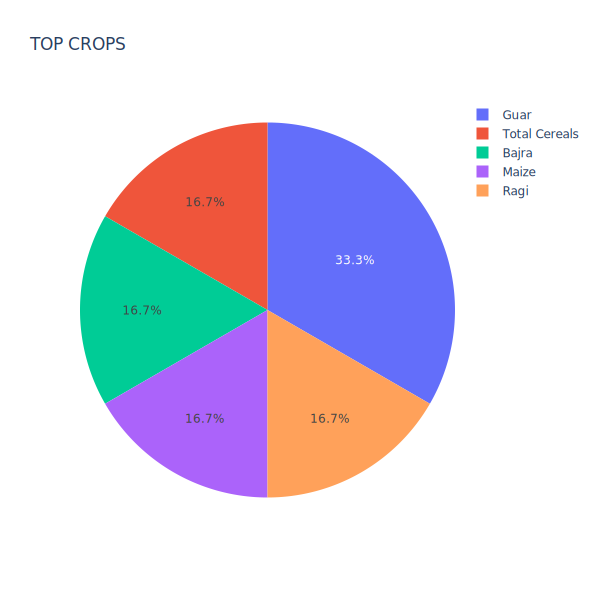

In [89]:
fig = px.pie(names=top_crops, values=values, title='TOP CROPS', width=600, height=600)
fig.show()

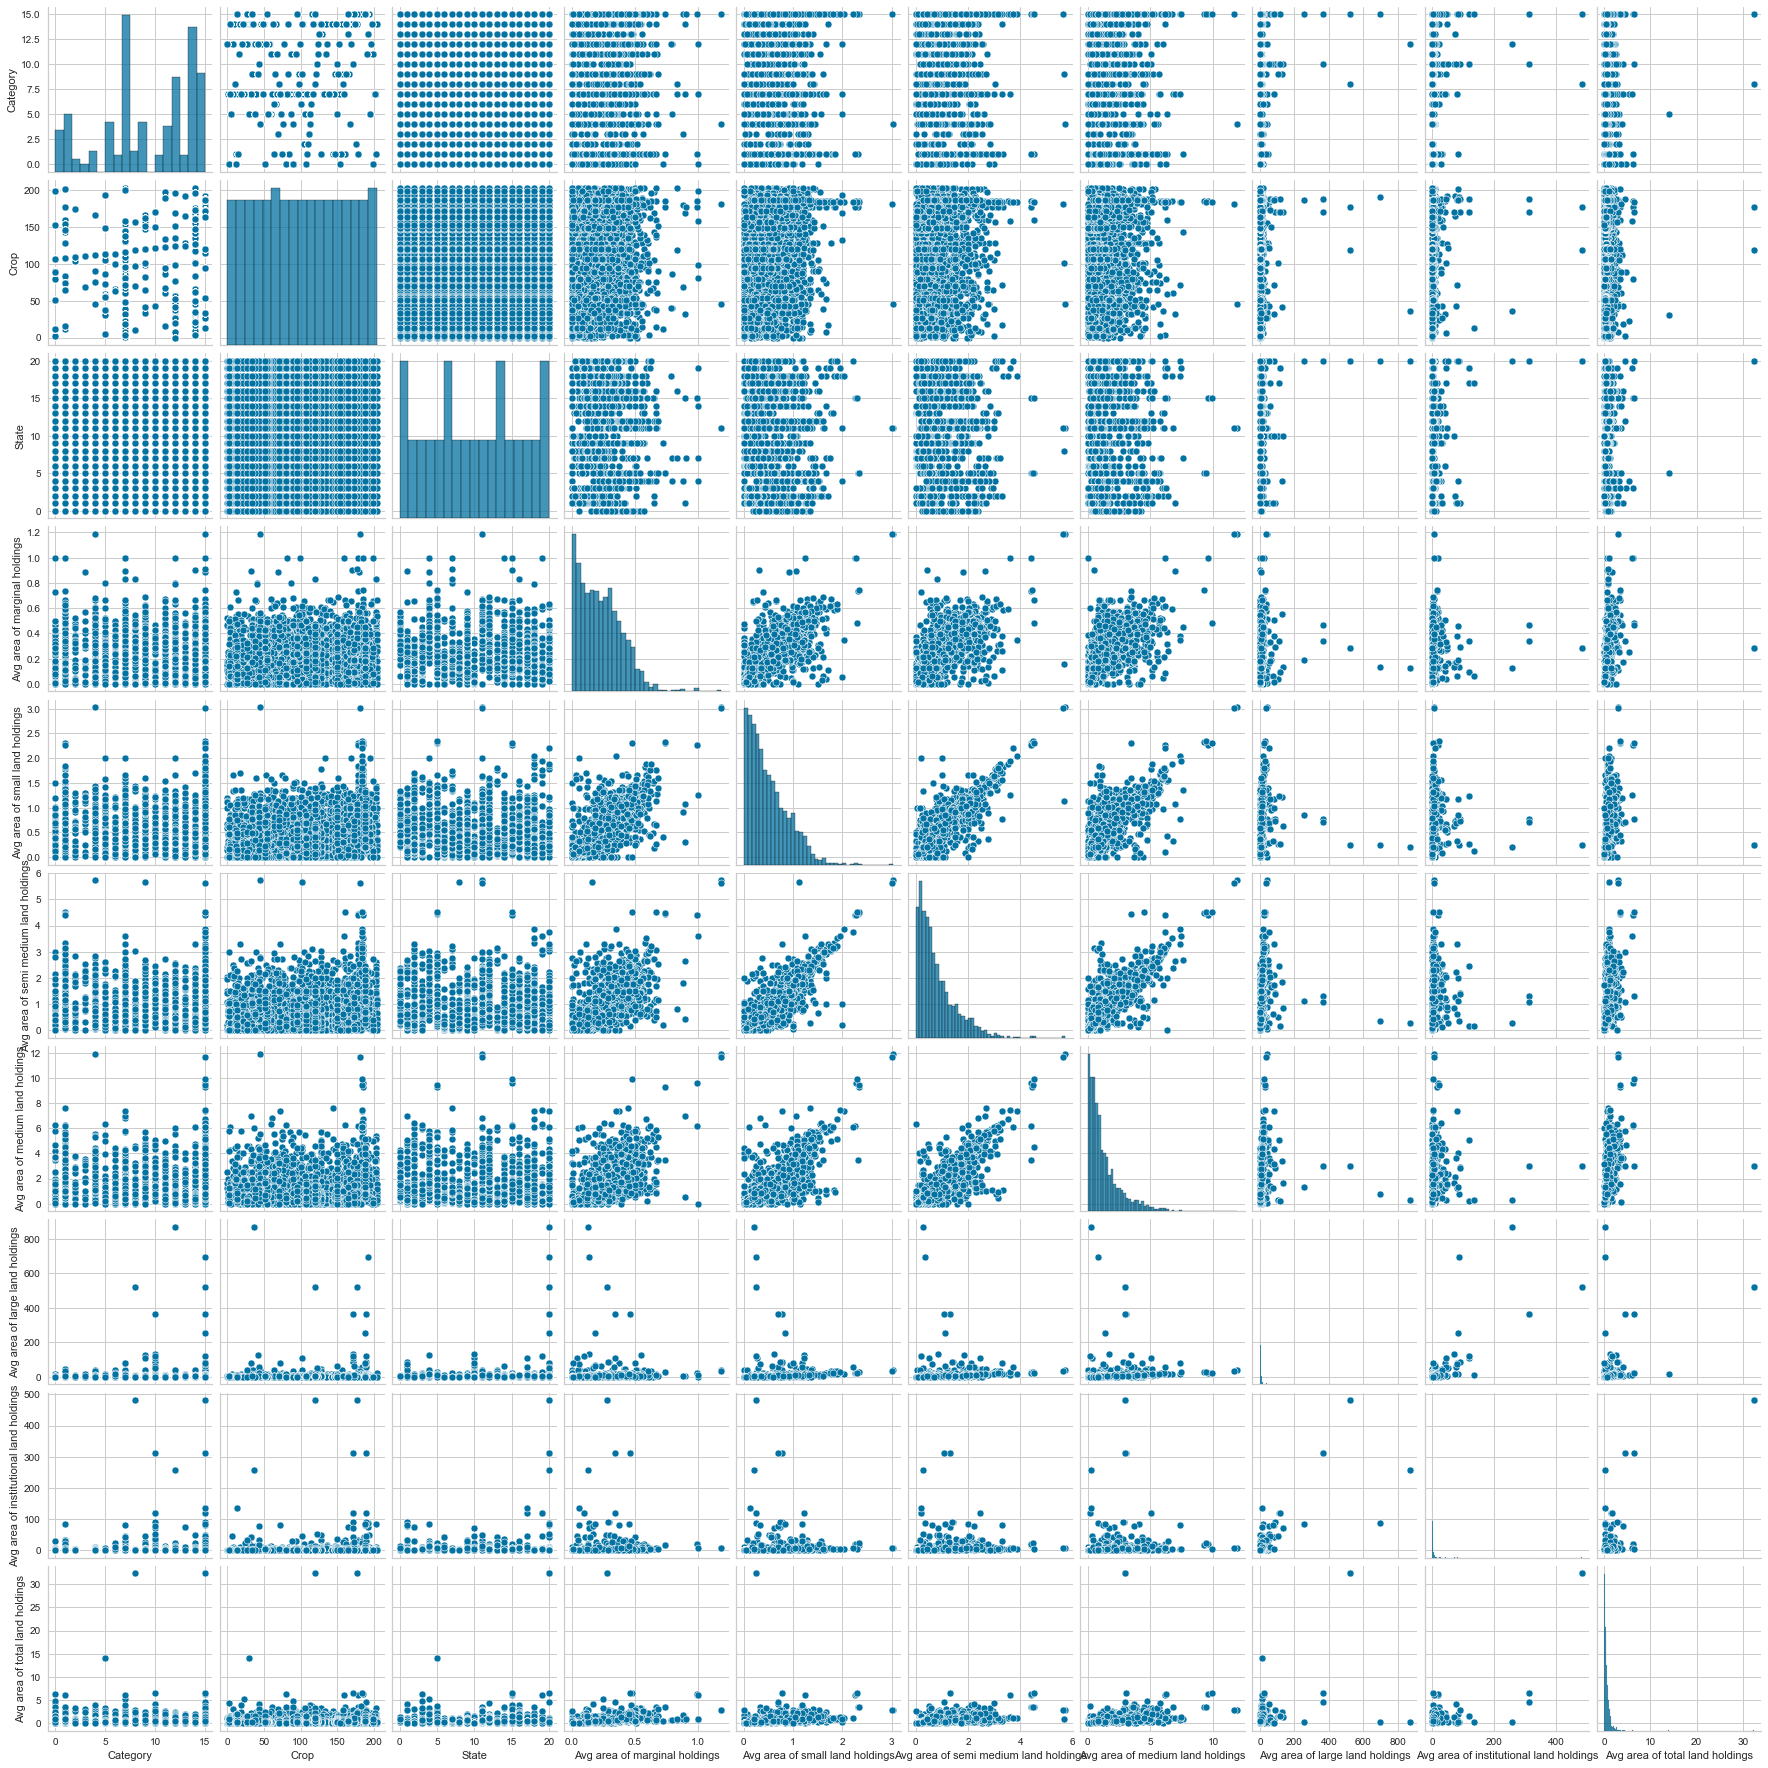

In [90]:
sns.pairplot(df1)

C:\Users\sandhya rani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='State', ylabel='Avg area of marginal holdings'>

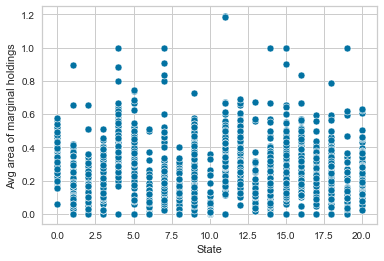

In [91]:
sns.scatterplot(df1["State"],df1["Avg area of marginal holdings"])